In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import matplotlib.ticker as ticker
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
from nltk.util import ngrams

In [ ]:
turkish_stopwords = set(stopwords.words('turkish'))
print(sorted(turkish_stopwords))

['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'da', 'daha', 'de', 'defa', 'diye', 'en', 'eğer', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'ile', 'ise', 'için', 'kez', 'ki', 'kim', 'mu', 'mü', 'mı', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niye', 'niçin', 'o', 'sanki', 'siz', 'tüm', 've', 'veya', 'ya', 'yani', 'çok', 'çünkü', 'şey', 'şu']


In [41]:
ozel_stoplar = {'bir','beden','elbise'}
stop_words = set(turkish_stopwords).union(ozel_stoplar)

In [60]:
ozel_stoplar = {'bir','iade','elbise','ettim'}
stop_words_iade = set(turkish_stopwords).union(ozel_stoplar)

In [ ]:
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [44]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data", "comments_final_labels.csv") 

df_comments = pd.read_csv(comments_path)

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor,bert_label,bert_skor,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.931962,olumlu,0.963947,olumlu,0.947954,olumlu,0.997684,olumlu,0.930659,olumlu,0.984298,olumlu,0.970880,olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumsuz,-0.669085,olumlu,0.991367,olumlu,0.161141,olumlu,0.936270,olumlu,0.857906,olumsuz,-0.775901,olumlu,0.339425,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumsuz,-0.964131,olumlu,0.924904,olumsuz,-0.019614,olumlu,0.990739,olumlu,0.886708,olumlu,0.897199,olumlu,0.924882,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.906424,olumlu,0.974138,olumlu,0.940281,olumlu,0.993717,olumlu,0.956035,olumlu,0.985931,olumlu,0.978561,olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.999406,olumlu,0.791039,olumsuz,-0.104184,olumsuz,-0.631333,olumlu,0.595040,olumsuz,-0.520216,olumsuz,-0.185503,olumsuz,-0.144843


In [45]:
columns_to_use = ['Tarih','Boy','Kilo','Beden' ,'Ürün Adı', 'Yorum_V1',  'final_label', 'final_skor']

df_comments = df_comments[columns_to_use].copy()

df_comments.head()

,Tarih,Boy,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.144843


Kelime Fonksiyonları

In [ ]:
def generate_wordcloud(df, label_column, text_column, label_value, title):
    text = " ".join(df[df[label_column] == label_value][text_column].dropna().astype(str))

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False,
        stopwords=stop_words,
        font_path='C:/Windows/Fonts/arial.ttf'  
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()


In [ ]:
def en_sik_20_kelime(df, label_column, text_column, label_value):
    text = " ".join(df[df[label_column] == label_value][text_column].dropna().astype(str)).lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    
    kelimeler = text.split()
    
    temiz_kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]
    
    en_sik = Counter(temiz_kelimeler).most_common(20)

    print(f"\n {label_value.upper()} yorumlarda en sık geçen 20 kelime:")
    for kelime, adet in en_sik:
        print(f"{kelime}: {adet}")

In [ ]:
def en_sik_bigram(df, label_column, text_column, label_value, ilk_kac=20):

    text = " ".join(df[df[label_column] == label_value][text_column].dropna().astype(str)).lower()

    text = re.sub(r'[^\w\s]', '', text)

    kelimeler = text.split()

    temiz_kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]

    bigrams = ngrams(temiz_kelimeler, 2)

    bigram_counts = Counter(bigrams).most_common(ilk_kac)

    print(f"\n {label_value.upper()} yorumlarda en sık geçen {ilk_kac} ikili kelime öbeği:")
    for (kelime1, kelime2), adet in bigram_counts:
        print(f"{kelime1} {kelime2}: {adet}")

In [ ]:
def bigram_wordcloud(df, label_column, text_column, label_value):

    text = " ".join(df[df[label_column] == label_value][text_column].dropna().astype(str)).lower()
    text = re.sub(r'[^\w\s]', '', text)
    kelimeler = text.split()
    temiz_kelimeler = [k for k in kelimeler if k not in stop_words]
    
    bigrams = ngrams(temiz_kelimeler, 2)
    bigram_counts = Counter(bigrams)
    
    bigram_dict = {" ".join(kelime): frekans for kelime, frekans in bigram_counts.items()}
    
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False,
        font_path='C:/Windows/Fonts/arial.ttf'  
    ).generate_from_frequencies(bigram_dict)
    
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{label_value.upper()} yorumlar için Bigram Word Cloud", fontsize=18)
    plt.show()

Olumsuz Etiketi İçin

In [50]:
en_sik_20_kelime(df_comments, 'final_label', 'Yorum_V1', 'olumsuz')


🔎 OLUMSUZ yorumlarda en sık geçen 20 kelime:
iade: 5369
geldi: 2257
büyük: 2195
kumaşı: 2039
değil: 1951
oldu: 1888
dar: 1872
aldım: 1860
güzel: 1802
ürün: 1765
kısmı: 1721
kötü: 1652
tam: 1528
ettim: 1442
küçük: 1362
var: 1281
bol: 1228
aşırı: 1143
beğenmedim: 1117
biraz: 1102


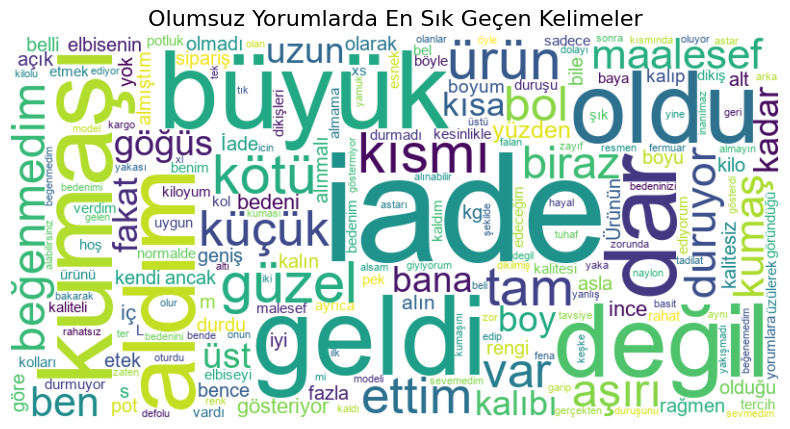

In [ ]:
generate_wordcloud(df_comments, label_column='final_label', text_column='Yorum_V1', label_value='olumsuz', title='Olumsuz Yorumlarda En Sık Geçen Kelimeler')

In [52]:
en_sik_bigram(df_comments, 'final_label', 'Yorum_V1', 'olumsuz')


🔗 OLUMSUZ yorumlarda en sık geçen 20 ikili kelime öbeği:
iade ettim: 1244
göğüs kısmı: 454
yüzden iade: 409
iç gösteriyor: 342
büyük geldi: 342
tam oldu: 336
maalesef iade: 298
üzülerek iade: 272
dar geldi: 270
iade ediyorum: 264
üst kısmı: 261
geldi iade: 247
dar oldu: 238
iade edeceğim: 233
iade etmek: 227
bol oldu: 221
bol geldi: 221
beğenmedim iade: 216
kalıbı dar: 209
kumaşı var: 203


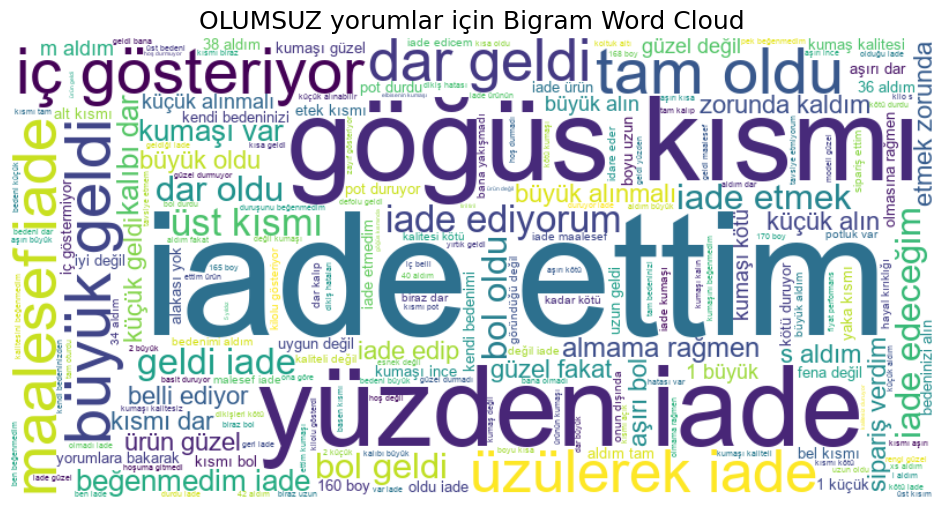

In [53]:
bigram_wordcloud(df_comments, 'final_label', 'Yorum_V1', 'olumsuz')

In [ ]:
def iade_kelimesi_wordcloud_ve_top20(df, label_column, text_column, label_value, target_word='iade'):

    df_label = df[df[label_column] == label_value]
    mask = df_label[text_column].str.lower().str.contains(target_word)
    df_iade = df_label[mask]

    text = " ".join(df_iade[text_column].dropna().astype(str)).lower()
    text = re.sub(r'[^\w\s]', '', text)

    kelimeler = text.split()

    stop_words_extended = stop_words_iade.union({target_word})
    temiz_kelimeler = [k for k in kelimeler if k not in stop_words_extended]

    kelime_sayaci = Counter(temiz_kelimeler)
    en_sik_20 = kelime_sayaci.most_common(20)

    print(f"\n '{target_word}' geçen '{label_value}' yorumlarda en sık 20 kelime:")
    for kelime, adet in en_sik_20:
        print(f"{kelime}: {adet}")

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path='C:/Windows/Fonts/arial.ttf'
    ).generate(" ".join(temiz_kelimeler))

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"'{target_word}' geçen '{label_value}' yorumlarda kelime dağılımı", fontsize=18)
    plt.show()



🔎 'iade' geçen 'olumsuz' yorumlarda en sık 20 kelime:
beden: 1595
geldi: 978
büyük: 741
ürün: 705
güzel: 693
oldu: 686
kumaşı: 642
kısmı: 636
dar: 626
aldım: 615
maalesef: 570
yüzden: 528
değil: 522
kötü: 474
küçük: 433
var: 423
bol: 422
tam: 418
aşırı: 396
beğenmedim: 393


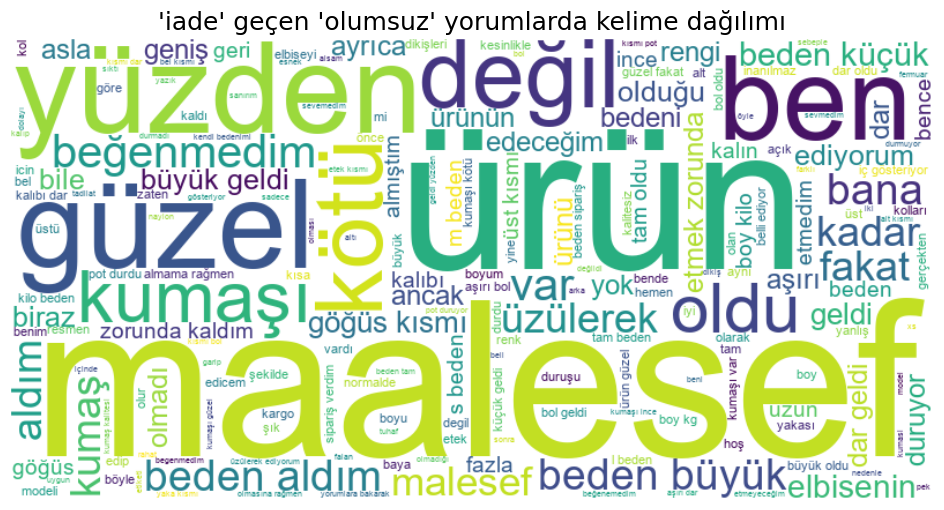

In [62]:
iade_kelimesi_wordcloud_ve_top20(df_comments, 'final_label', 'Yorum_V1', 'olumsuz', target_word='iade')

C:\Users\SILA\AppData\Local\Temp\ipykernel_15860\419036222.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label[text_column] = df_label[text_column].str.lower().fillna('')
C:\Users\SILA\AppData\Local\Temp\ipykernel_15860\419036222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label[text_column] = df_label[text_column].str.replace(r'[^\w\s]', '', regex=True)



📝 Bölgelere göre yorum sayıları (etiket: olumsuz)
         Yorum Sayısı
göğüs             846
üst               743
alt               366
bel               304
kol               211
ön                108
omuz              107
göbek             104
sırt               75
kalça              68
boyun              61
gögüs              55
dekolte            45
kollar             28
paça                5


<Figure size 1000x600 with 0 Axes>

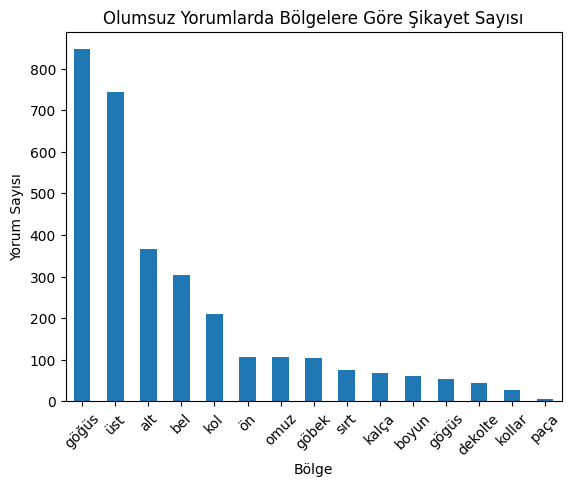

In [ ]:
vucut_bolgeleri = ['üst', 'alt', 'göğüs', 'bel', 'kalça', 'omuz', 'kol', 'sırt', 'boyun', 'paça', 'kollar', 'göbek','ön','dekolte','gögüs']

def vucut_bolgesi_sikligi(df, label_column, text_column, label_value, kelime_listesi):

    df_label = df[df[label_column] == label_value]

    df_label[text_column] = df_label[text_column].str.lower().fillna('')
    df_label[text_column] = df_label[text_column].str.replace(r'[^\w\s]', '', regex=True)

    bolge_sayilari = {kelime: 0 for kelime in kelime_listesi}

    for kelime in kelime_listesi:

        bolge_sayilari[kelime] = df_label[text_column].str.contains(r'\b' + re.escape(kelime) + r'\b').sum()

    bolge_df = pd.DataFrame.from_dict(bolge_sayilari, orient='index', columns=['Yorum Sayısı'])
    bolge_df = bolge_df.sort_values(by='Yorum Sayısı', ascending=False)

    print("\n Bölgelere göre yorum sayıları (etiket: {})".format(label_value))
    print(bolge_df)

    return bolge_df


df_bolge_sayilari = vucut_bolgesi_sikligi(df_comments, 'final_label', 'Yorum_V1', 'olumsuz', vucut_bolgeleri)


plt.figure(figsize=(10,6))
df_bolge_sayilari.plot(kind='bar', legend=False)
plt.title('Olumsuz Yorumlarda Bölgelere Göre Şikayet Sayısı')
plt.ylabel('Yorum Sayısı')
plt.xlabel('Bölge')
plt.xticks(rotation=45)
plt.show()


Olumlu Etiketi İçin:

In [56]:
en_sik_20_kelime(df_comments, 'final_label', 'Yorum_V1', 'olumlu')


🔎 OLUMLU yorumlarda en sık geçen 20 kelime:
güzel: 46490
tam: 26589
oldu: 20445
aldım: 20322
kumaşı: 10952
ürün: 10728
boy: 10245
beğendim: 9713
şık: 9581
büyük: 9106
harika: 8617
geldi: 8274
biraz: 8242
alın: 8064
kilo: 7688
rahat: 7664
iyi: 7255
küçük: 6869
ben: 6819
iade: 6394


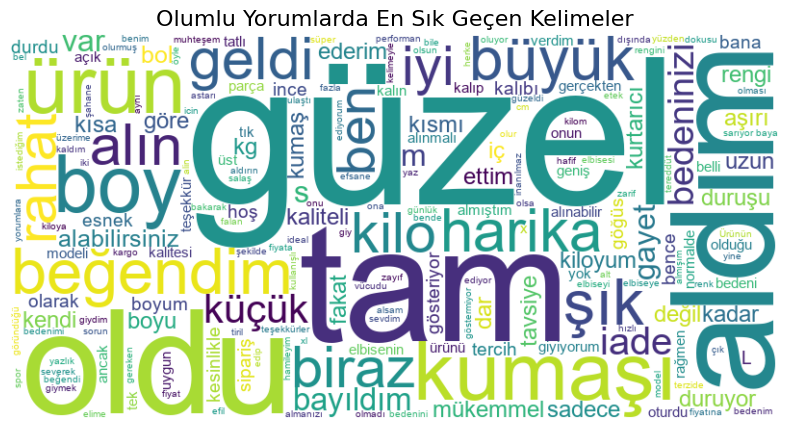

In [ ]:
generate_wordcloud(df_comments, label_column='final_label', text_column='Yorum_V1', label_value='olumlu', title='Olumlu Yorumlarda En Sık Geçen Kelimeler')

In [58]:
en_sik_bigram(df_comments, 'final_label', 'Yorum_V1', 'olumlu')


🔗 OLUMLU yorumlarda en sık geçen 20 ikili kelime öbeği:
tam oldu: 8501
aldım tam: 3630
ürün güzel: 2970
gayet güzel: 2672
güzel oldu: 2642
kendi bedeninizi: 2483
tavsiye ederim: 2382
tam bedeninizi: 2192
güzel tam: 2183
bedeninizi alın: 2136
bedeninizi alabilirsiniz: 2035
s aldım: 1976
m aldım: 1969
güzel ürün: 1751
teşekkür ederim: 1734
kumaşı güzel: 1636
160 boy: 1570
iade ettim: 1515
aldım güzel: 1477
oldu güzel: 1323


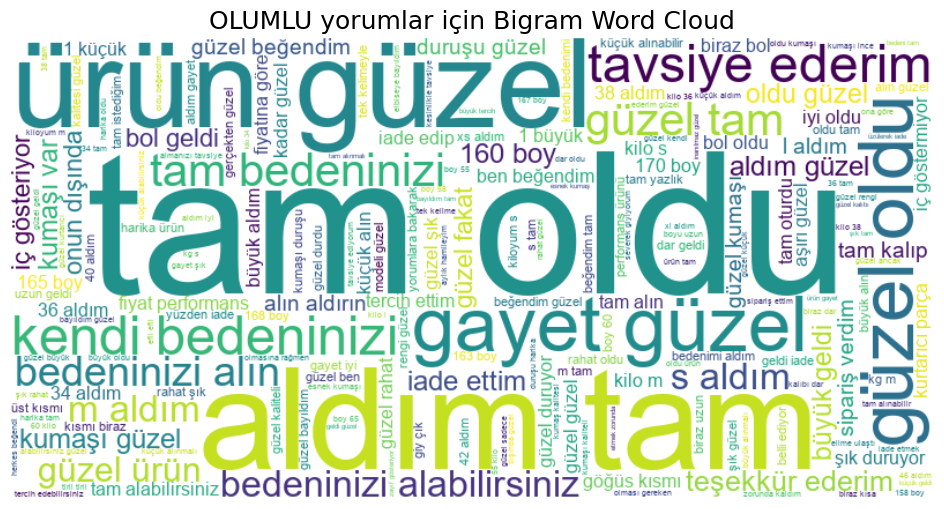

In [59]:
bigram_wordcloud(df_comments, 'final_label', 'Yorum_V1', 'olumlu')